In [1]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso

<AxesSubplot:>

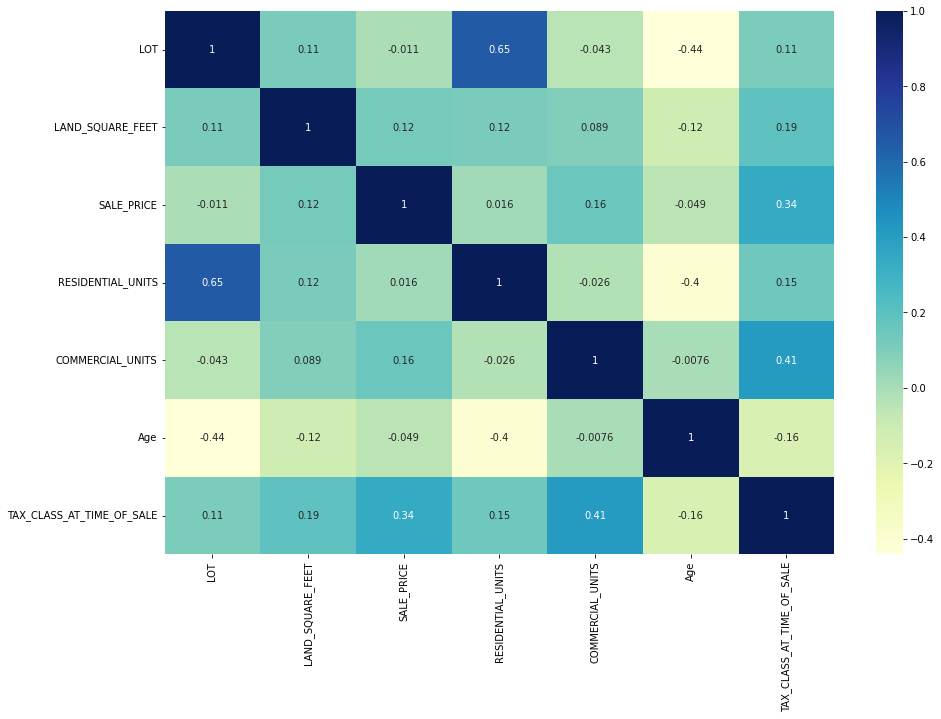

In [13]:
# List of features numerical features
cont = ['LOT', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALE_PRICE', 'SALE_DATE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'BUILDING_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'Age', 'TAX_CLASS', 'TAX_CLASS_AT_TIME_OF_SALE'] 

df=pd.read_csv('data_3.csv')

# removing comma from sale price and downsizing it by dividing by 1000
df.iloc[:,18] = df.iloc[:,18].replace(",", "", regex=True)
df.iloc[:,18] = df.iloc[:,18].apply(lambda x: int(x) / 1000)
df.iloc[:,13] = df.iloc[:,13].replace(",", "", regex=True)

df2 = df
y = df['SALE_PRICE']

df2['LAND_SQUARE_FEET'] = df2['LAND_SQUARE_FEET'].apply(lambda x: int(x))
# df3['GROSS_SQUARE_FEET'] = df3['GROSS_SQUARE_FEET'].apply(lambda x: int(x))

# calculating age of house at the time of sale
Age = pd.DatetimeIndex(df['SALE_DATE']).year - df['YEAR_BUILT']
df2['Age'] = Age

# mapping string code to int code to use TAX_CLASS_AT_PRESENT feature for regression
tax_class = df["TAX_CLASS_AT_PRESENT"].replace({"1B": "5", "2A": "6", "2B": "7"})
df2['TAX_CLASS'] = tax_class
# df2['TAX_CLASS_AT_TIME_OF_SALE'] = df['TAX_CLASS_AT_TIME_OF_SALE']

# Function to covert string to its ascii integer
def str_to_code(x):
    temp = ''
    for j in range(len(x)):
        if x[j] >= '0' and x[j] <= '9':
            temp = temp + str(ord(x[j]) - 48)
        else:
            temp = temp + str(ord(x[j]) - 64)
    return temp
    # print(temp)

# mapping string code to int code to use BUILDING_CLASS_AT_PRESENT feature for regression
df2['BUILDING_CLASS_AT_PRESENT'] = df2['BUILDING_CLASS_AT_PRESENT'].apply(lambda x: (str_to_code(x)))


# Plotting heatmap for correlation
plt.figure(figsize=(15,10))
sns.heatmap(df2[cont].corr(),annot=True,cmap="YlGnBu")

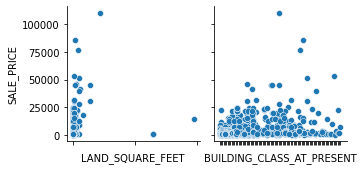

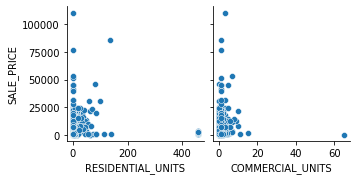

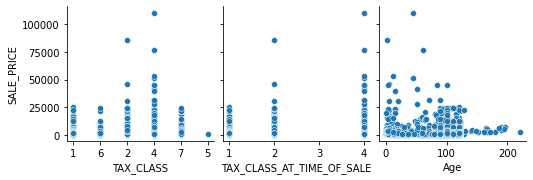

In [14]:
df4 = df2
df4['SALE_PRICE'] = df['SALE_PRICE']
g1 = sns.pairplot(data=df4,x_vars=["LAND_SQUARE_FEET", 'BUILDING_CLASS_AT_PRESENT'],y_vars="SALE_PRICE",kind='scatter')
g1.set(xticklabels = [])
sns.pairplot(data=df4,x_vars=['RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS'],y_vars="SALE_PRICE",kind='scatter')
sns.pairplot(data=df4,x_vars=['TAX_CLASS', 'TAX_CLASS_AT_TIME_OF_SALE', 'Age'],y_vars="SALE_PRICE",kind='scatter')